<a href="https://colab.research.google.com/github/noemi30600/ML-IoT-23/blob/main/IoT_23_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recolección de datos
Importamos la bibliotecas de Pandas y NumPy, además de los módulos Series, DataFrame y glob.

***glob** nos ayuda a encontrar nombres de archivos y directorios


In [ ]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import glob

glob.glob("/content/drive/MyDrive/DataSets/IoT-23/*.log.labeled")

['/content/drive/MyDrive/DataSets/IoT-23/H7-conn.log.labeled',
 '/content/drive/MyDrive/DataSets/IoT-23/H4-conn.log.labeled',
 '/content/drive/MyDrive/DataSets/IoT-23/H5-conn.log.labeled',
 '/content/drive/MyDrive/DataSets/IoT-23/conn.log.labeled',
 '/content/drive/MyDrive/DataSets/IoT-23/20-conn.log.labeled',
 '/content/drive/MyDrive/DataSets/IoT-23/21-conn.log.labeled',
 '/content/drive/MyDrive/DataSets/IoT-23/8-conn.log.labeled',
 '/content/drive/MyDrive/DataSets/IoT-23/9-conn.log.labeled',
 '/content/drive/MyDrive/DataSets/IoT-23/3-conn.log.labeled',
 '/content/drive/MyDrive/DataSets/IoT-23/1-conn.log.labeled']

Para integrar los archivos .conn.log.labeled en un solo Data Frame, haremos un loop de todos los archivos de la carpeta IoT-23. Al final, los agregamos en una misma lista con el método .append()

In [ ]:
column_names = ["ts", "uid", "id.orig_h", "id.orig_p", "id.resp_h", "id.resp_p", "proto",
    "service", "duration", "orig_bytes", "resp_bytes", "conn_state", "local_orig", "local_resp",
    "missed_bytes", "history", "orig_pkts", "orig_ip_bytes", "resp_pkts", "resp_ip_bytes",
    "tunnel_parents", "label", "detailed-label"]
all_df = []

for one_df in glob.glob("/content/drive/MyDrive/DataSets/IoT-23/*.log.labeled"):
  print(f'Loading {one_df}')
  df = pd.read_csv(one_df, sep="\t", skiprows=8, names = column_names)
  all_df.append(df)

Loading /content/drive/MyDrive/DataSets/IoT-23/H7-conn.log.labeled
Loading /content/drive/MyDrive/DataSets/IoT-23/H4-conn.log.labeled
Loading /content/drive/MyDrive/DataSets/IoT-23/H5-conn.log.labeled
Loading /content/drive/MyDrive/DataSets/IoT-23/conn.log.labeled
Loading /content/drive/MyDrive/DataSets/IoT-23/20-conn.log.labeled
Loading /content/drive/MyDrive/DataSets/IoT-23/21-conn.log.labeled
Loading /content/drive/MyDrive/DataSets/IoT-23/8-conn.log.labeled
Loading /content/drive/MyDrive/DataSets/IoT-23/9-conn.log.labeled


<ipython-input-2-8bc9ca964401>:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(one_df, sep="\t", skiprows=8, names = column_names)


Loading /content/drive/MyDrive/DataSets/IoT-23/3-conn.log.labeled


<ipython-input-2-8bc9ca964401>:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(one_df, sep="\t", skiprows=8, names = column_names)


Loading /content/drive/MyDrive/DataSets/IoT-23/1-conn.log.labeled


<ipython-input-2-8bc9ca964401>:9: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(one_df, sep="\t", skiprows=8, names = column_names)


In [ ]:
print(len(all_df))
for df in all_df:
    print(df.tail(2))

10
                    ts                               uid  \
129  1562164753.917407                CjD5ve2qwxfFtvd4zl   
130             #close  2019-07-09-11-28-26   benign   -   

                    id.orig_h  id.orig_p id.resp_h  id.resp_p proto service  \
129  fe80::5bcc:698e:39d5:cdf      133.0   ff02::2      134.0  icmp       -   
130                       NaN        NaN       NaN        NaN   NaN     NaN   

      duration  orig_bytes  ...  local_resp missed_bytes history orig_pkts  \
129  44.242223         0.0  ...           -          0.0       -       2.0   
130        NaN         NaN  ...         NaN          NaN     NaN       NaN   

     orig_ip_bytes resp_pkts  resp_ip_bytes  tunnel_parents  label  \
129           96.0       0.0            0.0  -   benign   -    NaN   
130            NaN       NaN            NaN             NaN    NaN   

     detailed-label  
129             NaN  
130             NaN  

[2 rows x 23 columns]
                    ts                     

In [ ]:
# Concatenar todos los DataFrames en uno solo
combined_df = pd.concat(all_df, ignore_index=True)

# Mostrar las primeras filas del DataFrame combinado
print(combined_df.head(2))

                  ts                 uid        id.orig_h  id.orig_p  \
0  1562159819.172195  CUg3u41D8SwgQw1Job          0.0.0.0       68.0   
1  1562159849.173340  CUpk9Y381SJuOHyK2d  255.255.255.255       68.0   

         id.resp_h  id.resp_p proto service   duration orig_bytes  ...  \
0  255.255.255.255       67.0   udp    dhcp  30.004642     8768.0  ...   
1      192.168.1.1       67.0   udp    dhcp   0.004564        0.0  ...   

  local_resp missed_bytes history orig_pkts  orig_ip_bytes resp_pkts  \
0          -          0.0       D      16.0         9216.0       0.0   
1          -          0.0      ^d       0.0            0.0      13.0   

   resp_ip_bytes  tunnel_parents  label  detailed-label  
0            0.0  -   benign   -    NaN             NaN  
1         4264.0  -   benign   -    NaN             NaN  

[2 rows x 23 columns]


In [ ]:
# Ejemplo práctico para la columna 'tunnel_parents'
labels = combined_df['tunnel_parents'].unique()  # Obtiene los valores únicos
label_count = combined_df['tunnel_parents'].nunique()  # Cuenta los valores únicos
label_frequencies = combined_df['tunnel_parents'].value_counts()  # Obtiene la frecuencia de cada valor único

print(f'Valores únicos: {labels}')
print(f'Cantidad de valores únicos: {label_count}')
print('Frecuencia de cada valor único:')
print(label_frequencies)


Valores únicos: ['-   benign   -' nan '-   Benign   -' '-   Malicious   C&C'
 '-   Malicious   PartOfAHorizontalPortScan' '-   Malicious   DDoS'
 '-   Malicious   C&C-Torii' '(empty)   Benign   -'
 '(empty)   Malicious   C&C'
 '(empty)   Malicious   PartOfAHorizontalPortScan'
 '(empty)   Malicious   Attack']
Cantidad de valores únicos: 10
Frecuencia de cada valor único:
tunnel_parents
(empty)   Malicious   PartOfAHorizontalPortScan    7040807
(empty)   Benign   -                                498540
-   Malicious   DDoS                                 14394
-   Benign   -                                        8388
(empty)   Malicious   C&C                             8238
-   Malicious   C&C                                   6706
(empty)   Malicious   Attack                          5962
-   benign   -                                        1956
-   Malicious   PartOfAHorizontalPortScan              122
-   Malicious   C&C-Torii                               30
Name: count, dtype: in

In [ ]:
split_columns = combined_df['tunnel_parents'].str.split(' ', expand=True)

columns_to_remove = [split_columns.columns[i] for i in [1, 2, 4, 5]]
split_columns = split_columns.drop(columns=columns_to_remove, axis=1)

# Iterate over each column in split_columns
for column in split_columns.columns:
    unique_values = split_columns[column].dropna().unique()  # Drop NaN values before finding unique
    print(f"Unique values in column '{column}': {unique_values}")


split_columns.columns = ["tunnel_parents", "label", "detailed-label"]
combined_df = combined_df.drop(["tunnel_parents", "label", "detailed-label"], axis=1)
combined_df = pd.concat([combined_df, split_columns], axis=1)



Unique values in column '0': ['-' '(empty)']
Unique values in column '3': ['benign' 'Benign' 'Malicious']
Unique values in column '6': ['-' 'C&C' 'PartOfAHorizontalPortScan' 'DDoS' 'C&C-Torii' 'Attack']


In [ ]:
combined_df['detailed-label'].value_counts()

,count
detailed-label,
PartOfAHorizontalPortScan,7040929
-,508884
C&C,14944
DDoS,14394
Attack,5962
C&C-Torii,30


In [ ]:
combined_df['label'].value_counts()

,count
label,
Malicious,7076259
Benign,506928
benign,1956


In [ ]:
labels = combined_df['label'].unique()  # Obtiene los valores únicos
label_count = combined_df['label'].nunique()  # Cuenta los valores únicos
label_frequencies = combined_df['label'].value_counts()  # Obtiene la frecuencia de cada valor único

print(f'Valores únicos: {labels}')
print(f'Cantidad de valores únicos: {label_count}')
print('Frecuencia de cada valor único:')
print(label_frequencies)

Valores únicos: ['benign' nan 'Benign' 'Malicious']
Cantidad de valores únicos: 3
Frecuencia de cada valor único:
label
Malicious    7076259
Benign        506928
benign          1956
Name: count, dtype: int64


In [ ]:
#Estandarizamos los valores de la columna 'label'. Pues el atributo 'Benign', se encontraba en 2 formatos diferentes
#Reemplazamos 'benign' por 'Benign', para que sea solo un mismo atributo
combined_df['label'] = combined_df['label'].replace({'benign': 'Benign'})

labels = combined_df['label'].unique()
print(f'Valores únicos: {labels}')

label_frequencies = combined_df['label'].value_counts()
print('Frecuencia de cada valor único:')
print(label_frequencies)

Valores únicos: ['Benign' nan 'Malicious']
Frecuencia de cada valor único:
label
Malicious    7076259
Benign        508884
Name: count, dtype: int64


In [ ]:
import matplotlib.pyplot as plt

dummy_variables = pd.get_dummies(combined_df['label'])
print(dummy_variables.tail(4))

         Benign  Malicious
7585149    True      False
7585150    True      False
7585151    True      False
7585152   False      False


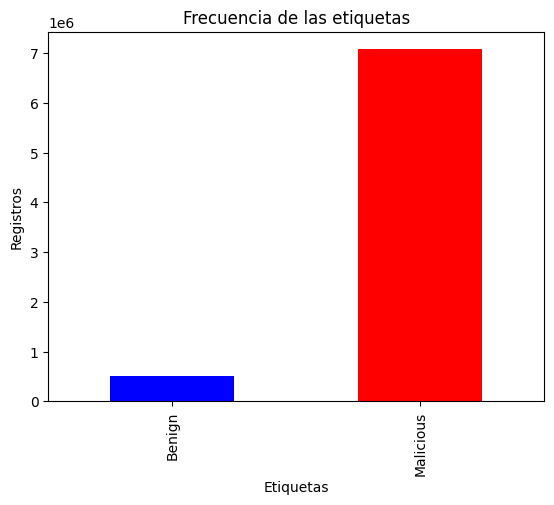

In [ ]:
dummy_variables.sum().plot.bar(color = ['blue', 'red'])
plt.xlabel('Etiquetas')
plt.ylabel('Registros')
plt.title('Frecuencia de las etiquetas')
plt.show()

In [ ]:
# Ejemplo práctico para la columna 'detail-label'
dlabels = combined_df['detailed-label'].unique()  # Obtiene los valores únicos
dlabel_count = combined_df['detailed-label'].nunique()  # Cuenta los valores únicos
dlabel_frequencies = combined_df['detailed-label'].value_counts()  # Obtiene la frecuencia de cada valor único

print(f'Valores únicos: {dlabels}')
print(f'Cantidad de valores únicos: {dlabel_count}')
print('Frecuencia de cada valor único:')
print(dlabel_frequencies)


Valores únicos: ['-' nan 'C&C' 'PartOfAHorizontalPortScan' 'DDoS' 'C&C-Torii' 'Attack']
Cantidad de valores únicos: 6
Frecuencia de cada valor único:
detailed-label
PartOfAHorizontalPortScan    7040929
-                             508884
C&C                            14944
DDoS                           14394
Attack                          5962
C&C-Torii                         30
Name: count, dtype: int64


In [ ]:
# Ejemplo práctico para la columna 'proto'
protos = combined_df['proto'].unique()  # Obtiene los valores únicos
proto_count = combined_df['proto'].nunique()  # Cuenta los valores únicos
proto_frequencies = combined_df['proto'].value_counts()  # Obtiene la frecuencia de cada valor único

print(f'Valores únicos: {protos}')
print(f'Cantidad de valores únicos: {proto_count}')
print('Frecuencia de cada valor único:')
print(proto_frequencies)


Valores únicos: ['udp' 'icmp' 'tcp' nan]
Cantidad de valores únicos: 3
Frecuencia de cada valor único:
proto
tcp     7127789
udp      435930
icmp      21424
Name: count, dtype: int64


In [ ]:
Missin = combined_df.isnull().sum()
print(Missin)

ts                 0
uid                0
id.orig_h         10
id.orig_p         10
id.resp_h         10
id.resp_p         10
proto             10
service           10
duration          10
orig_bytes        10
resp_bytes        10
conn_state        10
local_orig        10
local_resp        10
missed_bytes      10
history           10
orig_pkts         10
orig_ip_bytes     10
resp_pkts         10
resp_ip_bytes     10
tunnel_parents    10
label             10
detailed-label    10
dtype: int64


In [ ]:
#Eliminar filas vacías, según la etiqueta label
print(combined_df.shape)  # Imprime la forma antes de eliminar filas

combined_df.dropna(subset=["label"], axis=0, inplace=True)

print(combined_df.shape)  # Imprime la forma después de eliminar filas

(7585153, 23)
(7585143, 23)


In [ ]:
# Valores de la columna 'conn_state'
states = combined_df['conn_state'].unique()  # Obtiene los valores únicos
state_count = combined_df['conn_state'].nunique()  # Cuenta los valores únicos
state_frequencies = combined_df['conn_state'].value_counts()  # Obtiene la frecuencia de cada valor único

print(f'Valores únicos: {states}')
print(f'Cantidad de valores únicos: {state_count}')
print('Frecuencia de cada valor único:')
print(state_frequencies)


Valores únicos: ['S0' 'SHR' 'OTH' 'SF' 'S1' 'RSTR' 'RSTO' 'S3' 'SH' 'RSTRH' 'REJ' 'S2'
 'RSTOS0']
Cantidad de valores únicos: 13
Frecuencia de cada valor único:
conn_state
S0        7504446
OTH         35716
SF          29985
REJ         10738
RSTR         1662
S3           1611
RSTO          372
RSTOS0        201
SH            143
S1             90
S2             85
RSTRH          79
SHR            15
Name: count, dtype: int64


In [ ]:
print(combined_df.shape)
print(combined_df.info())
print(combined_df.describe())

(7585143, 23)
<class 'pandas.core.frame.DataFrame'>
Index: 7585143 entries, 0 to 7585151
Data columns (total 23 columns):
 #   Column          Dtype  
---  ------          -----  
 0   ts              object 
 1   uid             object 
 2   id.orig_h       object 
 3   id.orig_p       float64
 4   id.resp_h       object 
 5   id.resp_p       float64
 6   proto           object 
 7   service         object 
 8   duration        object 
 9   orig_bytes      object 
 10  resp_bytes      object 
 11  conn_state      object 
 12  local_orig      object 
 13  local_resp      object 
 14  missed_bytes    float64
 15  history         object 
 16  orig_pkts       float64
 17  orig_ip_bytes   float64
 18  resp_pkts       float64
 19  resp_ip_bytes   float64
 20  tunnel_parents  object 
 21  label           object 
 22  detailed-label  object 
dtypes: float64(7), object(16)
memory usage: 1.4+ GB
None
          id.orig_p     id.resp_p  missed_bytes     orig_pkts  orig_ip_bytes  \
count  7.585143

In [ ]:
# Eliminar las columnas no relevantes
combined_df = combined_df.drop(['ts', 'uid', 'id.orig_h', 'id.resp_h', 'local_orig', 'missed_bytes',
                                'local_resp', 'history', 'tunnel_parents'], axis=1)

# Verifica las columnas restantes (opcional)
print(combined_df.columns)

Index(['id.orig_p', 'id.resp_p', 'proto', 'service', 'duration', 'orig_bytes',
       'resp_bytes', 'conn_state', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts',
       'resp_ip_bytes', 'label', 'detailed-label'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
combined_df['label_encoded'] = le.fit_transform(combined_df['label'])

In [ ]:
# Aplica one-hot encoding a la variable "proto"
proto_encoded = pd.get_dummies(combined_df['proto'], prefix='proto')

# Concatena las variables codificadas al DataFrame original
combined_df = pd.concat([combined_df, proto_encoded], axis=1)

# Elimina la columna original "proto" si ya no la necesitas
combined_df = combined_df.drop(['proto'], axis=1)
print(combined_df.head(2))

   id.orig_p  id.resp_p service   duration orig_bytes resp_bytes conn_state  \
0       68.0       67.0    dhcp  30.004642     8768.0        0.0         S0   
1       68.0       67.0    dhcp   0.004564        0.0     3900.0        SHR   

   orig_pkts  orig_ip_bytes  resp_pkts  resp_ip_bytes   label detailed-label  \
0       16.0         9216.0        0.0            0.0  Benign              -   
1        0.0            0.0       13.0         4264.0  Benign              -   

   label_encoded  proto_icmp  proto_tcp  proto_udp  
0              0       False      False       True  
1              0       False      False       True  


In [ ]:
# Aplica one-hot encoding a la variable "conn_state"
conn_state_encoded = pd.get_dummies(combined_df['conn_state'], prefix='conn_state')

# Elimina una de las variables dummy para evitar multicolinealidad perfecta
conn_state_encoded = conn_state_encoded.drop('conn_state_SH', axis=1)

# Concatena las variables codificadas al DataFrame original
combined_df = pd.concat([combined_df, conn_state_encoded], axis=1)

# Elimina la columna original "conn_state" si ya no la necesitas
combined_df = combined_df.drop(['conn_state'], axis=1)

In [ ]:
# Aplica one-hot encoding a la variable "service"
service_encoded = pd.get_dummies(combined_df['service'], prefix='service')

# Concatena las variables codificadas al DataFrame original
combined_df = pd.concat([combined_df, service_encoded], axis=1)

# Elimina la columna original "conn_state" si ya no la necesitas
combined_df = combined_df.drop(['service'], axis=1)

In [ ]:
combined_df.head(20)

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,...,conn_state_S3,conn_state_SF,conn_state_SHR,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,68.0,67.0,30.004642,8768.0,0.0,16.0,9216.0,0.0,0.0,Benign,...,False,False,False,False,True,False,False,False,False,False
1,68.0,67.0,0.004564,0.0,3900.0,0.0,0.0,13.0,4264.0,Benign,...,False,False,True,False,True,False,False,False,False,False
2,5353.0,5353.0,3.948539,876.0,0.0,6.0,1164.0,0.0,0.0,Benign,...,False,False,False,False,False,True,False,False,False,False
3,5353.0,5353.0,3.768179,876.0,0.0,6.0,1164.0,0.0,0.0,Benign,...,False,False,False,False,False,True,False,False,False,False
4,5353.0,5353.0,0.000114,451.0,0.0,11.0,979.0,0.0,0.0,Benign,...,False,False,False,False,False,True,False,False,False,False
5,5353.0,5353.0,3.756296,876.0,0.0,6.0,1164.0,0.0,0.0,Benign,...,False,False,False,False,False,True,False,False,False,False
6,5353.0,5353.0,3.715573,876.0,0.0,6.0,1164.0,0.0,0.0,Benign,...,False,False,False,False,False,True,False,False,False,False
7,143.0,0.0,180.863984,600.0,0.0,14.0,1384.0,0.0,0.0,Benign,...,False,False,False,True,False,False,False,False,False,False
8,135.0,136.0,134.816029,96.0,0.0,4.0,288.0,0.0,0.0,Benign,...,False,False,False,True,False,False,False,False,False,False
9,133.0,134.0,135.000174,0.0,0.0,4.0,192.0,0.0,0.0,Benign,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
#Descargar nuevo DataFrame
from google.colab import files

combined_df.to_csv('IoT23-dataframe.csv', index=False)

# Descargar el archivo
files.download('IoT23-dataframe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Visualizar los tipos de datos de cada columna
combined_df.dtypes

,0
id.orig_p,float64
id.resp_p,float64
duration,object
orig_bytes,object
resp_bytes,object
orig_pkts,float64
orig_ip_bytes,float64
resp_pkts,float64
resp_ip_bytes,float64
label,object


In [ ]:
# Convertir los datos de tipo Objeto a Numericos
#pd.to_numeric para convertir columnas de objeto a numerico
for col in combined_df.select_dtypes(include=['object']).columns:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

# Check the data types after conversion
combined_df.dtypes

,0
id.orig_p,float64
id.resp_p,float64
duration,float64
orig_bytes,float64
resp_bytes,float64
orig_pkts,float64
orig_ip_bytes,float64
resp_pkts,float64
resp_ip_bytes,float64
label,float64


In [ ]:
#Reemplazar valores faltantes '-' por '0'
combined_df['duration'] = combined_df['duration'].replace('-','0')
combined_df['orig_bytes'] = combined_df['orig_bytes'].replace('-','0')
combined_df['resp_bytes'] = combined_df['resp_bytes'].replace('-','0')

#Convertir a valores numericos
combined_df['duration'] = pd.to_numeric(combined_df['duration'])
combined_df['orig_bytes'] = pd.to_numeric(combined_df['orig_bytes'])
combined_df['resp_bytes'] = pd.to_numeric(combined_df['resp_bytes'])

print(combined_df.dtypes)

id.orig_p            float64
id.resp_p            float64
duration             float64
orig_bytes           float64
resp_bytes           float64
orig_pkts            float64
orig_ip_bytes        float64
resp_pkts            float64
resp_ip_bytes        float64
label                 object
detailed-label        object
label_encoded          int64
proto_icmp              bool
proto_tcp               bool
proto_udp               bool
conn_state_OTH          bool
conn_state_REJ          bool
conn_state_RSTO         bool
conn_state_RSTOS0       bool
conn_state_RSTR         bool
conn_state_RSTRH        bool
conn_state_S0           bool
conn_state_S1           bool
conn_state_S2           bool
conn_state_S3           bool
conn_state_SF           bool
conn_state_SHR          bool
service_-               bool
service_dhcp            bool
service_dns             bool
service_http            bool
service_irc             bool
service_ssh             bool
service_ssl             bool
dtype: object


In [ ]:
#combined_df.fillna(-1,inplace=True)
combined_df.isna().sum()

,0
id.orig_p,0
id.resp_p,0
duration,0
orig_bytes,0
resp_bytes,0
orig_pkts,0
orig_ip_bytes,0
resp_pkts,0
resp_ip_bytes,0
label,0


In [ ]:
combined_df.head()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,...,conn_state_S3,conn_state_SF,conn_state_SHR,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,68.0,67.0,30.004642,8768.0,0.0,16.0,9216.0,0.0,0.0,Benign,...,False,False,False,False,True,False,False,False,False,False
1,68.0,67.0,0.004564,0.0,3900.0,0.0,0.0,13.0,4264.0,Benign,...,False,False,True,False,True,False,False,False,False,False
2,5353.0,5353.0,3.948539,876.0,0.0,6.0,1164.0,0.0,0.0,Benign,...,False,False,False,False,False,True,False,False,False,False
3,5353.0,5353.0,3.768179,876.0,0.0,6.0,1164.0,0.0,0.0,Benign,...,False,False,False,False,False,True,False,False,False,False
4,5353.0,5353.0,0.000114,451.0,0.0,11.0,979.0,0.0,0.0,Benign,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Muestra los valores únicos en la columna 'duration'
print(combined_df['duration'].mean())
combined_df['duration'] = combined_df['duration'].fillna(combined_df['duration'].mean())
combined_df.head()

0.29182140924383365


,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,...,conn_state_S3,conn_state_SF,conn_state_SHR,service_-,service_dhcp,service_dns,service_http,service_irc,service_ssh,service_ssl
0,68.0,67.0,30.004642,8768.0,0.0,16.0,9216.0,0.0,0.0,Benign,...,False,False,False,False,True,False,False,False,False,False
1,68.0,67.0,0.004564,0.0,3900.0,0.0,0.0,13.0,4264.0,Benign,...,False,False,True,False,True,False,False,False,False,False
2,5353.0,5353.0,3.948539,876.0,0.0,6.0,1164.0,0.0,0.0,Benign,...,False,False,False,False,False,True,False,False,False,False
3,5353.0,5353.0,3.768179,876.0,0.0,6.0,1164.0,0.0,0.0,Benign,...,False,False,False,False,False,True,False,False,False,False
4,5353.0,5353.0,0.000114,451.0,0.0,11.0,979.0,0.0,0.0,Benign,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
#Visualizar los tipos de datos de cada columna
combined_df.shape

(7585143, 34)

In [ ]:
# Seleccionar solamente las columnas con valores numericos para la matriz de correlacion
num_bool_df = combined_df.select_dtypes(include=['number','bool'])

# Calcular la matriz de correlacion
correlation_matrix = num_bool_df.corr()

# Mostrar el calculo de correlacion correspondiente a la columna 'label_encoded', que etiqueta Malicious/Benign
if 'label_encoded' in num_bool_df.columns:
    print(correlation_matrix['label_encoded'])

id.orig_p           -0.081607
id.resp_p           -0.750048
duration            -0.006654
orig_bytes          -0.000147
resp_bytes          -0.001395
orig_pkts           -0.002119
orig_ip_bytes       -0.000313
resp_pkts           -0.001542
resp_ip_bytes       -0.001399
label_encoded        1.000000
proto_icmp          -0.198461
proto_tcp            0.944506
proto_udp           -0.920732
conn_state_OTH      -0.146718
conn_state_REJ      -0.085476
conn_state_RSTO     -0.022503
conn_state_RSTOS0   -0.018275
conn_state_RSTR     -0.001299
conn_state_RSTRH    -0.004686
conn_state_S0        0.208371
conn_state_S1       -0.007490
conn_state_S2       -0.006501
conn_state_S3        0.002932
conn_state_SF       -0.123714
conn_state_SHR      -0.005244
service_-            0.048199
service_dhcp        -0.018115
service_dns         -0.092238
service_http        -0.001031
service_irc          0.003952
service_ssh          0.005950
service_ssl         -0.012629
Name: label_encoded, dtype: float64


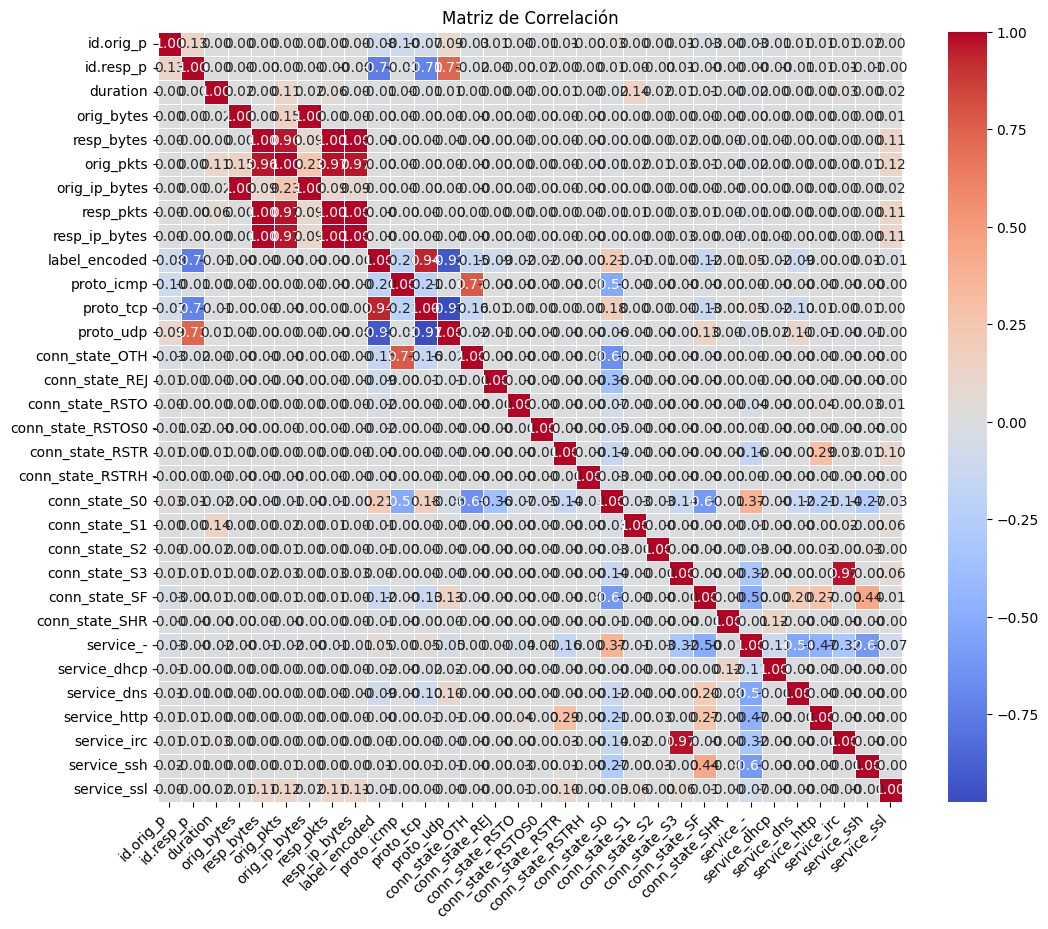

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Visualizar la matriz de correlación a través de un heatmap (1 es la correlacion más cercana)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Rota las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Ajusta el título
plt.title('Matriz de Correlación')
plt.show()

In [ ]:
combined_df.describe()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label_encoded
count,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06
mean,3.464561e+04,2.428956e+03,2.918214e-01,1.274675e+01,4.763813e+01,1.144550e+00,6.239527e+01,7.581083e-02,5.147738e+01,9.329104e-01
std,1.835947e+04,9.643475e+03,6.297015e+01,2.748769e+04,1.221967e+05,4.656454e+01,2.778727e+04,8.725385e+01,1.269558e+05,2.501771e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.913800e+04,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
50%,3.727200e+04,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
75%,4.938000e+04,8.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
max,6.553500e+04,6.553500e+04,9.328003e+04,7.554662e+07,3.365164e+08,1.236570e+05,7.606306e+07,2.394840e+05,3.496187e+08,1.000000e+00


In [ ]:
#from sklearn.preprocessing import StandardScaler

# Crea un objeto StandardScaler
#scaler = StandardScaler()

# Ajusta el escalador a los datos de 'duration' y transforma la variable
#combined_df['duration_scaled'] = scaler.fit_transform(combined_df['duration'].values.reshape(-1, 1))

In [ ]:
combined_df.describe()

,id.orig_p,id.resp_p,duration,orig_bytes,resp_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label_encoded
count,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06,7.585143e+06
mean,3.464561e+04,2.428956e+03,2.918214e-01,1.274675e+01,4.763813e+01,1.144550e+00,6.239527e+01,7.581083e-02,5.147738e+01,9.329104e-01
std,1.835947e+04,9.643475e+03,6.297015e+01,2.748769e+04,1.221967e+05,4.656454e+01,2.778727e+04,8.725385e+01,1.269558e+05,2.501771e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.913800e+04,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
50%,3.727200e+04,2.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
75%,4.938000e+04,8.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00
max,6.553500e+04,6.553500e+04,9.328003e+04,7.554662e+07,3.365164e+08,1.236570e+05,7.606306e+07,2.394840e+05,3.496187e+08,1.000000e+00


In [ ]:
#Exportar Dataframe como archivo CSV
combined_df.to_csv('preprocessed_iot23.csv')

In [ ]:
#Copiar el conjunto de datos CSV a la carpeta de Google Drive
!cp /content/preprocessed_iot23.csv /content/drive/MyDrive/DataSets/IoT-23
